<a href="https://colab.research.google.com/github/jc-atharva/INTRADAY-TRADING-INDICATOR/blob/main/INTRADAY_TRADING_INDICATOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MARKET ENTRY OR EXIT INDICATION PROJECT -**

# **INTRODUCTION -**
This project seeks to project potential entry and exit points during an intraday trading of the stock and check the validity of the same.

The machine learning algorithm used for the same is "SVM" or Support Vector Machine which is a classification algorithm. A classification is an approach of machine learning, which consist of allocating a label to each data point. This involves taking input and running it into a classification technique or a classifier to map it into a discrete class or category. The classifier draws a hyperplane to segregate the clusters made by the data values. The goal of a classification algorithm is to detect a defined number of clusters that have the same pattern to predict an output.

In our daily lives, classification algorithms are used in various fields, and the most common are medical diagnosis, spam, fraud detection, handwriting recognition, customer segmentation, risk assessment etc.

Examples of classification algorithms include - 


*   K-nearest neigbour algorithm
*   Random forest using decision trees
*   Support Vector Machines 
*   Naive Bayes Classification


**WHY SVM CLASSIFICATION? -**

SVM Classifier uses polynomial degrees to choose an optimal line that maximises the distance between the boundary and the nearest points in any class. It may use cubic, quadratic or even sigmoid equations for this.




# **IMPORTING ESSENTIAL LIBRARIES -**

Libraries used in this project are -


*   YFinance - Library to extract stock data from yahoo finance
*   Ta-Lib - Technical Analysis Library used to calculate metrics such as RSI, which are fundamental to TA.
*   Plotly - For elaborative Data Visualization
*   Scikit-learn - For SVC and validating our predictions 
*   Pandas
*   NumPy







In [313]:
!pip install yfinance
!pip install plotly
!pip install -U scikit-learn

In [314]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h516909a_0.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py37ha21ca33_2.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.7/dist-packages/ lib/python3.7/site-packages/talib --strip-components=3
import talib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3901    0  3901    0     0  19505      0 --:--:-- --:--:-- --:--:-- 19505
100  503k  100  503k    0     0  1108k      0 --:--:-- --:--:-- --:--:-- 4615k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3909    0  3909    0     0  20903      0 --:--:-- --:--:-- --:--:-- 20903
100  406k  100  406k    0     0  1006k      0 --:--:-- --:--:-- --:--:-- 1006k


In [315]:
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import talib as ta 
import yfinance as yf
import plotly.graph_objs as go

# **IMPORTING DATA-**

The model can be divided into 4 major steps - 


1.   Step 1 - Query live market data
2.   Step 2 - Data Processing
3.   Step 3 - Algorithm creation
4.   Step 4 - Predicting signals and evaluating them


**IMPORTING AND VISUALISING STOCK DATA-**

In [316]:
df=yf.download('NQ=F',period='1d',interval='1m')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-05-10 00:00:00-04:00,12308.00,12308.00,12308.00,12308.00,12308.00,0
2022-05-10 00:01:00-04:00,12308.00,12308.00,12308.00,12308.00,12308.00,40
2022-05-10 00:02:00-04:00,12308.00,12308.00,12308.00,12308.00,12308.00,32
2022-05-10 00:03:00-04:00,12308.00,12308.00,12308.00,12308.00,12308.00,36
2022-05-10 00:04:00-04:00,12308.00,12308.00,12308.00,12308.00,12308.00,57
...,...,...,...,...,...,...
2022-05-10 14:35:00-04:00,12424.00,12451.00,12421.75,12447.50,12447.50,1430
2022-05-10 14:36:00-04:00,12447.50,12456.75,12435.50,12438.75,12438.75,1263
2022-05-10 14:37:00-04:00,12439.00,12450.75,12423.50,12431.00,12431.00,940


In [317]:
fig=go.Figure()
fig.add_trace(go.Candlestick(x=df.index,
                             open=df['Open'],
                             high=df['High'],
                             low=df['Low'],
                             close=df['Close'], name = 'Stock Data'))

fig.update_layout(title = 'Price graph', yaxis_title = 'Stock price (USD)')
fig.update_xaxes(rangeslider_visible = True, rangeselector = dict(buttons = list([
                                                                                  dict(count=1,label='30m',step='minute',stepmode='backward'),
                                                                                  dict(count=6,label='90m',step='minute',stepmode='backward'),
                                                                                  dict(count=1,label='HTD',step='hour',stepmode='todate'),
                                                                                  dict(step='all')
])))

fig.show()

# **DATA CLEANING / PROCESSING**- 
As the time intervals between any 2 events is very small, columns such as Volume may report 0 value for some timestamps, which would cause problems in our further calculations. Thus, it is better to clear them.

In [318]:
df=df.drop(df[df['Volume']==0].index)

**CALCULATION OF INDEX AND ADDITION OF EXTRA VARIABLES-**

The technical indicator that we will combine with our SVM algorithm is the RSI.

The RSI (Relative Strength Index) is a well-known trading indicator based on momentum strategy.

It will analyse the market variation and give the relative strength index (RSI). Here is the mathematics behind it:

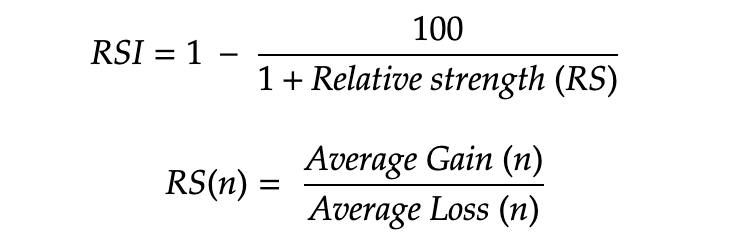


In [319]:
n=10
df['RSI']=ta.RSI(np.array(df['Close'].shift(1)),timeperiod=n)
df

,Open,High,Low,Close,Adj Close,Volume,RSI
Datetime,,,,,,,
2022-05-10 00:01:00-04:00,12308.0,12308.00,12308.00,12308.00,12308.00,40,NaN
2022-05-10 00:02:00-04:00,12308.0,12308.00,12308.00,12308.00,12308.00,32,NaN
2022-05-10 00:03:00-04:00,12308.0,12308.00,12308.00,12308.00,12308.00,36,NaN
2022-05-10 00:04:00-04:00,12308.0,12308.00,12308.00,12308.00,12308.00,57,NaN
2022-05-10 00:05:00-04:00,12308.0,12308.00,12308.00,12308.00,12308.00,35,NaN
...,...,...,...,...,...,...,...
2022-05-10 14:33:00-04:00,12420.5,12427.25,12413.25,12425.25,12425.25,760,40.164762
2022-05-10 14:34:00-04:00,12424.0,12428.25,12415.25,12425.00,12425.00,748,42.568884
2022-05-10 14:35:00-04:00,12424.0,12451.00,12421.75,12447.50,12447.50,1430,42.457387


In [320]:
from plotly.subplots import make_subplots

fig=make_subplots(rows=2,cols=1,row_heights=[0.7,0.3])
fig.add_trace(go.Candlestick(x=df.index,
                             open=df['Open'],
                             high=df['High'],
                             low=df['Low'],
                             close=df['Close'], name = 'Stock Data'),row=1,col=1)

fig.update_xaxes(rangeslider_visible=False)
fig.add_trace(go.Scatter(x=df.index,y=df['RSI'],name='RSI',line=dict(color='royalblue',width=1.2)),row=2,col=1)

fig.show()

**EXTRA INDICATORS-**

The Parabolic SAR is a technical indicator developed by J. Welles Wilder to determine the direction that an asset is moving. The indicator is also referred to as a stop and reverse system, which is abbreviated as SAR. It aims to identify potential reversals in the price movement of traded assets.

A simple moving average is a technical indicator that can aid in determining if an asset price will continue or if it will reverse a bull or bear trend. 

ADX is used to quantify trend strength. ADX calculations are based on a moving average of price range expansion over a given period of time. The default setting is 14 bars, although other time periods can be used.

In [321]:
df['SMA']=df['Close'].shift(1).rolling(window=n).mean()
df['Corr']=df['Close'].shift(1).rolling(window=n).corr(df['SMA'].shift(1))
df['SAR']=ta.SAR(np.array(df['High'].shift(1)),np.array(df['Low'].shift(1)),0.2,0.2)
df['ADX']=ta.ADX(np.array(df['High'].shift(1)),np.array(df['Low'].shift(1)),np.array(df['Open'].shift(1)),timeperiod=n)

df

,Open,High,Low,Close,Adj Close,Volume,RSI,SMA,Corr,SAR,ADX
Datetime,,,,,,,,,,,
2022-05-10 00:01:00-04:00,12308.0,12308.00,12308.00,12308.00,12308.00,40,NaN,NaN,NaN,NaN,NaN
2022-05-10 00:02:00-04:00,12308.0,12308.00,12308.00,12308.00,12308.00,32,NaN,NaN,NaN,NaN,NaN
2022-05-10 00:03:00-04:00,12308.0,12308.00,12308.00,12308.00,12308.00,36,NaN,NaN,NaN,12308.00,NaN
2022-05-10 00:04:00-04:00,12308.0,12308.00,12308.00,12308.00,12308.00,57,NaN,NaN,NaN,12308.00,NaN
2022-05-10 00:05:00-04:00,12308.0,12308.00,12308.00,12308.00,12308.00,35,NaN,NaN,NaN,12308.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-10 14:33:00-04:00,12420.5,12427.25,12413.25,12425.25,12425.25,760,40.164762,12425.625,0.468748,12409.87,27.003188
2022-05-10 14:34:00-04:00,12424.0,12428.25,12415.25,12425.00,12425.00,748,42.568884,12423.725,0.172742,12410.50,27.177099
2022-05-10 14:35:00-04:00,12424.0,12451.00,12421.75,12447.50,12447.50,1430,42.457387,12422.150,-0.200950,12413.25,27.189373


**DATA PROCESSING AND CLEANING-**

In [322]:
df['Prev_High']=df['High'].shift(1)
df['Prev_Low']=df['Low'].shift(1)
df['Prev_Close']=df['Close'].shift(1)

In [323]:
df['OO']=df['Open']-df['Open'].shift(1)
df['OC']=df['Open']-df['Prev_Close']

In [324]:
df['Ret']=(df['Open'].shift(-1)-df['Open'])/df['Open']

for i in range(1,n):
  df['return%i' %i]=df['Ret'].shift(i)


In [325]:
df.loc[df['Corr']< -1, 'Corr']=-1

df.loc[df['Corr']> 1, 'Corr']=1
df=df.dropna()

# **ALGORITHM FORMULATION-**

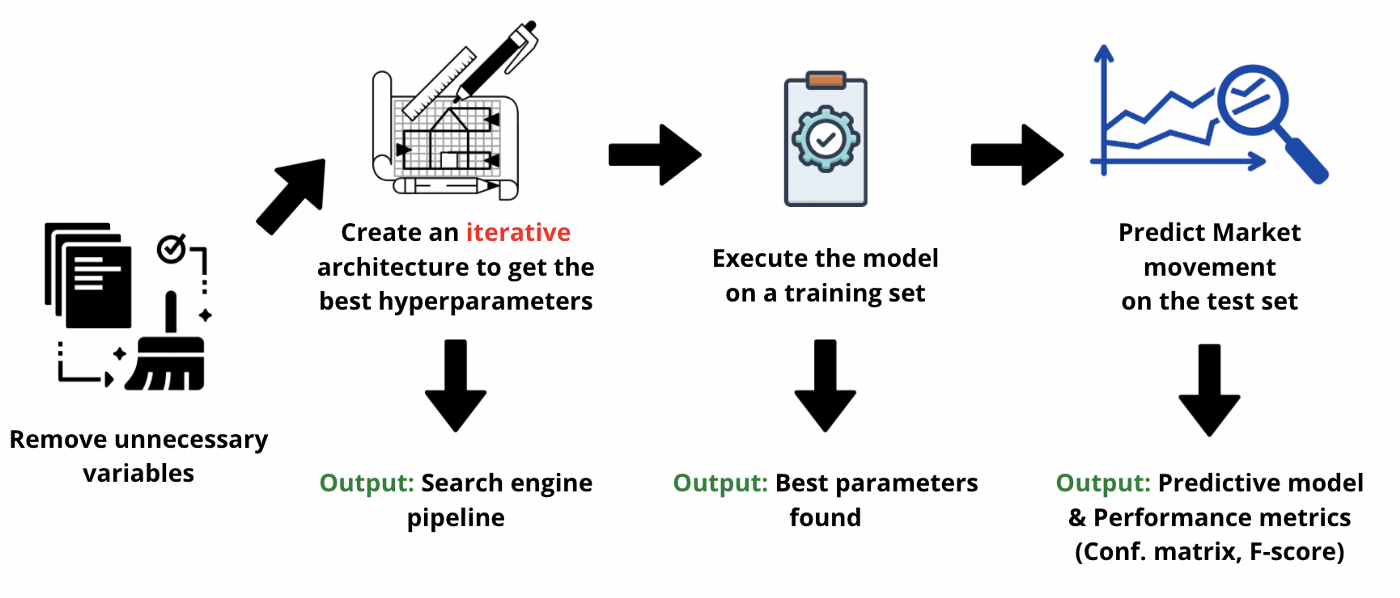

**SPLITTING DATA INTO TEST AND TRAIN DATA-**

In [326]:
t=.8
split = int(t*len(df))
split

670

In [327]:
import warnings
warnings.filterwarnings('ignore')

df['Signal']=0
df.loc[df['Ret']>df['Ret'][:split].quantile(q=0.66),'Signal']=1
df.loc[df['Ret']<df['Ret'][:split].quantile(q=0.34),'Signal']=-1

df

,Open,High,Low,Close,Adj Close,Volume,RSI,SMA,Corr,SAR,...,return1,return2,return3,return4,return5,return6,return7,return8,return9,Signal
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-05-10 00:21:00-04:00,12299.75,12302.50,12299.75,12299.75,12299.75,44,20.793882,12301.725,0.902411,12302.15,...,0.000041,0.000102,0.000000,-0.000203,-0.000163,0.000102,-0.000224,-0.000102,-0.000061,0
2022-05-10 00:22:00-04:00,12299.00,12300.75,12298.00,12300.00,12300.00,22,32.351389,12301.100,0.824745,12295.75,...,-0.000061,0.000041,0.000102,0.000000,-0.000203,-0.000163,0.000102,-0.000224,-0.000102,0
2022-05-10 00:23:00-04:00,12299.25,12300.00,12294.25,12296.00,12296.00,75,34.131270,12300.550,0.709698,12297.10,...,0.000020,-0.000061,0.000041,0.000102,0.000000,-0.000203,-0.000163,0.000102,-0.000224,-1
2022-05-10 00:24:00-04:00,12295.50,12297.25,12294.75,12295.75,12295.75,45,23.254217,12299.600,0.730784,12302.50,...,-0.000305,0.000020,-0.000061,0.000041,0.000102,0.000000,-0.000203,-0.000163,0.000102,0
2022-05-10 00:25:00-04:00,12295.25,12298.50,12295.00,12296.50,12296.50,56,22.750726,12299.025,0.776909,12300.85,...,-0.000020,-0.000305,0.000020,-0.000061,0.000041,0.000102,0.000000,-0.000203,-0.000163,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-10 14:32:00-04:00,12420.25,12428.75,12414.75,12421.00,12421.00,692,38.947029,12430.900,0.645861,12402.15,...,-0.000925,0.000221,0.000987,0.001250,-0.001590,-0.000885,-0.000764,-0.000241,-0.002185,0
2022-05-10 14:33:00-04:00,12420.50,12427.25,12413.25,12425.25,12425.25,760,40.164762,12425.625,0.468748,12409.87,...,0.000020,-0.000925,0.000221,0.000987,0.001250,-0.001590,-0.000885,-0.000764,-0.000241,1
2022-05-10 14:34:00-04:00,12424.00,12428.25,12415.25,12425.00,12425.00,748,42.568884,12423.725,0.172742,12410.50,...,0.000282,0.000020,-0.000925,0.000221,0.000987,0.001250,-0.001590,-0.000885,-0.000764,0


In [328]:
X=df.drop(['Close','Signal','High','Low','Volume','Ret'],axis=1)
y=df['Signal']

**HYPERPARAMETER SELECTION-**

Four main parameters are used for a support vector model: C, Gamma, Kernel and Epsilon (but Epsilon is used primarily for SVR and not SVM).

The main difference between these hyperparameters is the way to calculate the decision boundaries.

Each of these parameters will need to be “tuned”, and we will need to define a specific value. This value will determine the degree of the fitting. Thanks to these parameters, the AI will think and predict the market in a certain way.



In [329]:
c=[10,100,1000,10000]
g=[1e-2,1e-1,1e0]

parameters = {'svc__C':c, 'svc__gamma':g, 'svc__kernel':['rbf']}

steps=[('scaler',StandardScaler()),('svc',SVC())]

pipeline=Pipeline(steps)

rcv = RandomizedSearchCV(pipeline,parameters,cv=TimeSeriesSplit(n_splits=2))

**Difference between C, Gamma & Kernel**

C parameter will define the hyperplane(decision boundary) by adding a penalty for each data point misclassified. If C is large, the SVM will tend to overfit, whilst if C is low, the model will be more relaxed and give better boundaries in many cases but tend to underfit.

On another side, gamma will work on the distance of influence for each training point. It will create microclusters by minimizing the distance between points. Low-value gamma indicates a large similarity radius which results in more points being grouped. For high gamma values, the data points need to be very close to each other to be considered in the same group (or class).


Regarding Kernel, it will compute decision boundaries in terms of similarity measures. Whilst we need to define a value for others, we must specify the type of equations to use for the kernel. There are four main kernels: Linear kernel, Polynomial kernel, Logistic/ Sigmoid kernel, Gaussian/RBF kernel.

The one that we will use is based on the gaussian distribution as it is closer to the market behaviour.

**Training the model and select the best outputs-**

To achieve this task, we are going first to pass our training dataset within our randomized search function (named rcv). Then using the function best_params_ for each parameter (C, gamma, kernel) to let the machine select the optimum values. Then, instantiate a new support vector classifier function with the best hyperparameters chosen by the engine.

In [330]:
rcv.fit(X.iloc[:split], y.iloc[:split])

best_C = rcv.best_params_['svc__C']

best_kernel = rcv.best_params_['svc__kernel']

best_gamma = rcv.best_params_['svc__gamma']

In [331]:
cls=SVC(C=best_C,kernel=best_kernel,gamma=best_gamma)

In [332]:
ss=StandardScaler()
cls.fit(ss.fit_transform(X.iloc[:split]), y.iloc[:split])

SVC(C=100, gamma=0.01)

# **PREDICTING THE MARKET -**

In [333]:
y_predict=cls.predict(ss.transform(X.iloc[split:]))
df['Pred_Signal']=0

y_predict

array([ 0, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1, -1, -1, -1, -1,  1,  1,  1, -1,  1, -1,  1, -1,  1, -1,  1,  1,
        1, -1,  1, -1,  1, -1,  1, -1,  1,  0,  1,  0,  0,  1, -1, -1,  1,
        1,  1, -1,  1,  1,  1,  1,  0,  1,  1, -1,  0, -1, -1,  0,  1, -1,
       -1, -1,  1,  1,  1,  1,  0, -1,  1,  1,  1, -1,  1, -1,  0, -1,  0,
        1, -1,  1, -1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1, -1, -1,  1,  0,  1,
        1,  1, -1, -1,  1,  1, -1, -1,  1,  0,  1,  0, -1, -1,  1,  1, -1,
       -1, -1, -1,  1, -1,  0,  1,  0,  1,  0, -1, -1, -1,  1, -1,  0,  1,
       -1, -1, -1, -1,  0, -1,  1,  1,  0, -1, -1,  1,  1,  1, -1])

In [334]:
df.iloc[:split, df.columns.get_loc('Pred_Signal')] = pd.Series(
    cls.predict(ss.transform(X.iloc[:split])).tolist())

# Save the predicted values for the test data
df.iloc[split:, df.columns.get_loc('Pred_Signal')] = y_predict

In [335]:
df

,Open,High,Low,Close,Adj Close,Volume,RSI,SMA,Corr,SAR,...,return2,return3,return4,return5,return6,return7,return8,return9,Signal,Pred_Signal
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-05-10 00:21:00-04:00,12299.75,12302.50,12299.75,12299.75,12299.75,44,20.793882,12301.725,0.902411,12302.15,...,0.000102,0.000000,-0.000203,-0.000163,0.000102,-0.000224,-0.000102,-0.000061,0,0
2022-05-10 00:22:00-04:00,12299.00,12300.75,12298.00,12300.00,12300.00,22,32.351389,12301.100,0.824745,12295.75,...,0.000041,0.000102,0.000000,-0.000203,-0.000163,0.000102,-0.000224,-0.000102,0,0
2022-05-10 00:23:00-04:00,12299.25,12300.00,12294.25,12296.00,12296.00,75,34.131270,12300.550,0.709698,12297.10,...,-0.000061,0.000041,0.000102,0.000000,-0.000203,-0.000163,0.000102,-0.000224,-1,0
2022-05-10 00:24:00-04:00,12295.50,12297.25,12294.75,12295.75,12295.75,45,23.254217,12299.600,0.730784,12302.50,...,0.000020,-0.000061,0.000041,0.000102,0.000000,-0.000203,-0.000163,0.000102,0,0
2022-05-10 00:25:00-04:00,12295.25,12298.50,12295.00,12296.50,12296.50,56,22.750726,12299.025,0.776909,12300.85,...,-0.000305,0.000020,-0.000061,0.000041,0.000102,0.000000,-0.000203,-0.000163,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-10 14:32:00-04:00,12420.25,12428.75,12414.75,12421.00,12421.00,692,38.947029,12430.900,0.645861,12402.15,...,0.000221,0.000987,0.001250,-0.001590,-0.000885,-0.000764,-0.000241,-0.002185,0,-1
2022-05-10 14:33:00-04:00,12420.50,12427.25,12413.25,12425.25,12425.25,760,40.164762,12425.625,0.468748,12409.87,...,-0.000925,0.000221,0.000987,0.001250,-0.001590,-0.000885,-0.000764,-0.000241,1,1
2022-05-10 14:34:00-04:00,12424.00,12428.25,12415.25,12425.00,12425.00,748,42.568884,12423.725,0.172742,12410.50,...,0.000020,-0.000925,0.000221,0.000987,0.001250,-0.001590,-0.000885,-0.000764,0,1


**CALCULATION OF RETURNS FOR THE SIGNAL AND VISULISATION OF PERFORMANCE AGAINST THE STOCK-**

In [336]:
df['Ret1']=df['Ret']*df['Pred_Signal']

In [337]:
fig=go.Figure()

fig.add_trace(go.Scatter(x=df.index[split:],y=(df['Ret'][split:]+1).cumprod(),line=dict(color='royalblue',width=8),name = 'stock returns'))
fig.add_trace(go.Scatter(x=df.index[split:],y=(df['Ret1'][split:]+1).cumprod(),line=dict(color='orange',width=8),name = 'Strategy returns'))

fig.update_layout(title='Support Vector Machine Strategy', yaxis_title='Stock return (%)')

fig.show()

# **VALIDATING RESULTS OBTAINED-**

To validate our results, we use confusion matrix plotted as a heatmap as well as run a classification report check to see the precision of the signals provided by the algorithm.

In [338]:
cm=confusion_matrix(y[split:],y_predict)
cm

array([[53,  7, 12],
       [ 7,  6, 11],
       [ 4,  6, 62]])

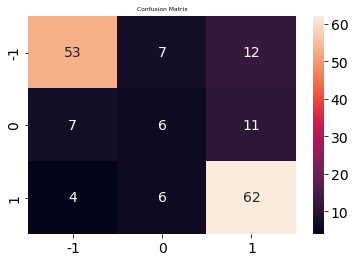

In [339]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title("Confusion Matrix",fontsize=6)
plt.xlabel("Predicted Labels",fontsize=14)
plt.ylabel("True Labels",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.rcParams.update({'font.size':14})

ax=plt.subplot()
sns.heatmap(cm,annot=True,ax = ax)

ax.xaxis.set_ticklabels(['-1','0','1'])
ax.yaxis.set_ticklabels(['-1','0','1'])
plt.show()

In [340]:
cr=classification_report(y[split:],y_predict)
print(cr)

              precision    recall  f1-score   support

          -1       0.83      0.74      0.78        72
           0       0.32      0.25      0.28        24
           1       0.73      0.86      0.79        72

    accuracy                           0.72       168
   macro avg       0.62      0.62      0.62       168
weighted avg       0.71      0.72      0.71       168



While we can see that the model predicts a good % of buy and sell signals present in the data, we also see that errors regarding polar opposite signals remain very low, that is, it does not suggest to buy in a bear period and does not recommend selling in a bull period. This essentially ensures a lower risk to the trader as they can be saved from a potentially false signal.